In [ ]:
%matplotlib inline

from ngramkit.common.w2v_model import W2VModel
from ngramkit.ngram_analyze.cosine_similarity_time_series import cosine_similarity_over_years, plot_nearest_neighbors
from ngramkit.ngram_analyze.weat_time_series import compute_weat_over_years
from ngramkit.ngram_analyze.semantic_drift import track_yearly_drift, compute_similarity_to_previous_year
from ngramkit.ngram_analyze.average_relatedness_by_year import track_word_semantic_drift

# **Analyze Semantic Change**
## **Goal**: Use trained `Word2vec` embeddings to examine semantic change over time.

The `ngram-kit` package contains several tools useful in quantifying how much word meanings have changed over the years. Before using these tools, it helps to set a model path variable. Most commonly, this will point to the `norm_and_align` directory. We'll also set a `corpus_path` variable pointing to the yearly corpus data.

In [2]:
model_path =  '/scratch/edk202/NLP_models/Google_Books/20200217/eng-fiction/5gram_files/models_final/norm_and_align'

### `compare_words_cosim` method

Let's say we want to measure the relationship between three pairs of words — _horse_ and _donkey_, _horse_ and _lizard_ , and _horse_ and _amoeba_ — in the 2019 corpus. We first create a `W2VModel` instance for the 2019 embeddings. Then, we call the `compare_words_cosim` method for our words.

In [3]:
year = 2019
model = W2VModel(f'{model_path}/w2v_y{year}_wbnone_vs200_w004_mc001_sg1_e010.kv')

word1, word2 = 'horse', 'mare'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'deer'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'ivy'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

word1, word2 = 'horse', 'atom'
similarity = model.compare_words_cosim(word1, word2)
print(f"cos(Φ) of \'{word1}\' and \'{word2}\' in {year} = {similarity:.4f}")

cos(Φ) of 'horse' and 'mare' in 2019 = 0.6836
cos(Φ) of 'horse' and 'deer' in 2019 = 0.4535
cos(Φ) of 'horse' and 'ivy' in 2019 = 0.1512
cos(Φ) of 'horse' and 'atom' in 2019 = 0.0592


The results are about what would would expect!

### `compare_models_cosim` method
Suppose we want to compare the semantic similarity of the _same_ words across _models_. We can use the `compare_models_cosim` method to compute the average cosine similarity between shared words in two models. Or, if we specify the `word` parameter, we can compute similarity for a single word across the models.

In [4]:
model = W2VModel(f'{model_path}/w2v_y2019_wbnone_vs200_w004_mc001_sg1_e010.kv')
reference_model = W2VModel(f'{model_path}/w2v_y2018_wbnone_vs200_w004_mc001_sg1_e010.kv')

cosim_mean, cosim_sd, shared_words = model.compare_models_cosim(reference_model)
print(f"Overall similarity between models:\n  cos(Φ) mean = {cosim_mean:.4f}\n  cos(Φ) SD = {cosim_sd:.4f}\n  shared words: {shared_words}\n")

word = 'horse'
cosim, _, _ = model.compare_models_cosim(reference_model, word)
print(f"Similarity of \'{word}\' between models:\n  cos(Φ) = {cosim:.4f}\n")

Overall similarity between models:
  cos(Φ) mean = 0.8607
  cos(Φ) SD = 0.0417
  shared words: 14978

Similarity of 'horse' between models:
  cos(Φ) = 0.9324



### `track_yearly_drift` function

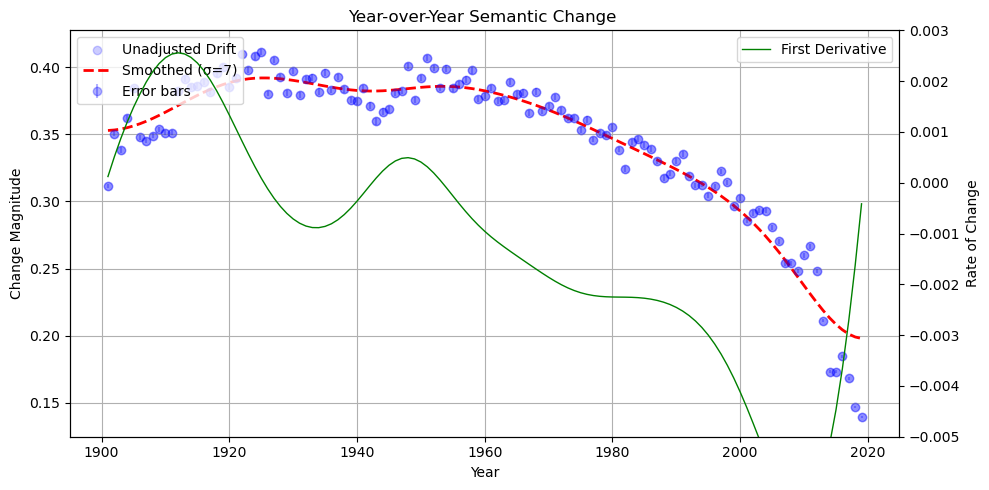

In [35]:
drift_scores = track_yearly_drift(
    start_year=1900,
    end_year=2019,
    model_dir=model_path,
    plot=True,
    error_type='CI',
    smooth=True,
    sigma=7,
    confidence=0.99
)

### `mean_cosine_similarity_to_all` class

In [6]:
model = W2VModel(f'{model_path}/w2v_y2019_wbnone_vs200_w004_mc001_sg1_e010.kv')

mean_sim = model.mean_cosine_similarity_to_all('person', '')
print(f"Mean cosine similarity = {mean_sim:.4f}")

Mean cosine similarity = 0.1798


Tracking semantic drift for word: 'gay' (Excluding: 0 words)


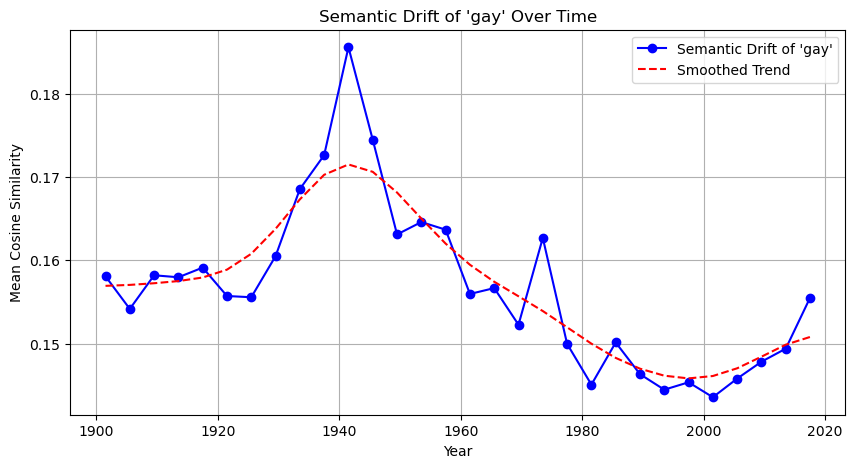

{1900: (0.1517583035558705, 0),
 1901: (0.15829751630066233, 0),
 1902: (0.16430972316599537, 0),
 1903: (0.15798168106705063, 0),
 1904: (0.1507522460015166, 0),
 1905: (0.15687284380894026, 0),
 1906: (0.15629147748011915, 0),
 1907: (0.15276448165674728, 0),
 1908: (0.1597134728722551, 0),
 1909: (0.1512550195084973, 0),
 1910: (0.16417878035212433, 0),
 1911: (0.15769721367493045, 0),
 1912: (0.1537557205981309, 0),
 1913: (0.16197261677282357, 0),
 1914: (0.15683186591715234, 0),
 1915: (0.15932738556746878, 0),
 1916: (0.16134680645944033, 0),
 1917: (0.1557416498081831, 0),
 1918: (0.16738624802967658, 0),
 1919: (0.15204869244487895, 0),
 1920: (0.15174335269523706, 0),
 1921: (0.16275355792195723, 0),
 1922: (0.1523149796997927, 0),
 1923: (0.1560799932314386, 0),
 1924: (0.15826363574581548, 0),
 1925: (0.15526278583594558, 0),
 1926: (0.15431012481793013, 0),
 1927: (0.1544589252899683, 0),
 1928: (0.15698634777311085, 0),
 1929: (0.1627159396175761, 0),
 1930: (0.1578030042

In [39]:
track_word_semantic_drift(
    word='gay',
    start_year=1900,
    end_year=2019,
    model_dir=f'{model_path}',
    plot=4,
    smooth=True,
    sigma=2
)

### `cosine_similarity_over_years` function

The `cosine_similarity_time_series` function uses the `compare_words_cosim` method to track the relationship between a pair of words across time. Simply specify your two words (`word1` and `word2`), a `start_year` and `end_year`, and the model directory. You'll get a list of years and associated cosine similarities; set `plot=True` if you want to graph them. The model will skip any years for which there is no model or there words aren't in the models' shared vocabulary.

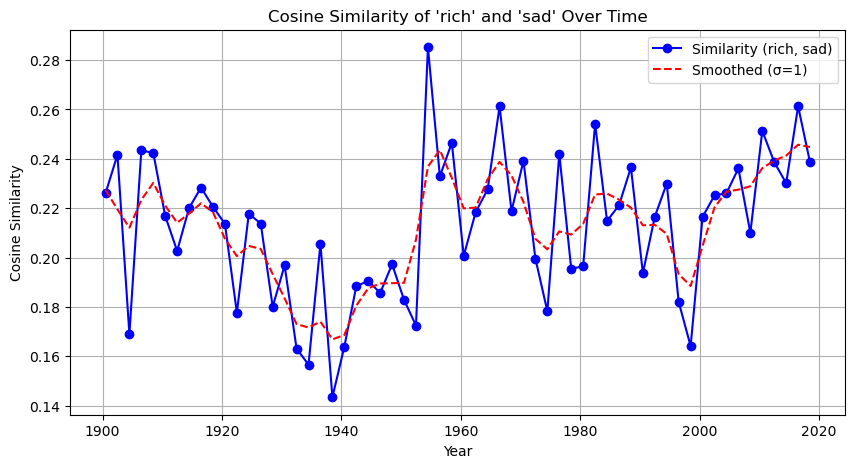

{1900: 0.2205327,
 1901: 0.23146527,
 1902: 0.238852,
 1903: 0.24442099,
 1904: 0.18075475,
 1905: 0.15722199,
 1906: 0.25588885,
 1907: 0.2308951,
 1908: 0.24598497,
 1909: 0.23877932,
 1910: 0.25098965,
 1911: 0.182699,
 1912: 0.18139815,
 1913: 0.22393227,
 1914: 0.2182153,
 1915: 0.22196108,
 1916: 0.27313924,
 1917: 0.18353398,
 1918: 0.15688974,
 1919: 0.28420138,
 1920: 0.23892896,
 1921: 0.18841894,
 1922: 0.15375671,
 1923: 0.20152833,
 1924: 0.1926494,
 1925: 0.24283126,
 1926: 0.15630616,
 1927: 0.27118707,
 1928: 0.17788132,
 1929: 0.18226393,
 1930: 0.17302567,
 1931: 0.22063483,
 1932: 0.18724759,
 1933: 0.13895032,
 1934: 0.13981144,
 1935: 0.17343278,
 1936: 0.20352669,
 1937: 0.20767523,
 1938: 0.1193592,
 1939: 0.16749676,
 1940: 0.18700357,
 1941: 0.14077994,
 1942: 0.18719758,
 1943: 0.18950596,
 1944: 0.23827623,
 1945: 0.14287843,
 1946: 0.21376403,
 1947: 0.15751274,
 1948: 0.22267431,
 1949: 0.17187637,
 1950: 0.18787593,
 1951: 0.17782031,
 1952: 0.13619372,
 1

In [10]:
cosine_similarity_over_years(
    word1='rich',
    word2='sad',
    start_year=1900,
    end_year=2019,
    model_dir=f'{model_path}',
    plot=2,
    smooth=True,
    sigma=1
)

### `compute_weat` method
This method runs a Word Embedding Association Test (WEAT) as described in [Caliskan, Bryson, and Narayanan, 2017](https://www.science.org/doi/10.1126/science.aal4230). The WEAT is a close analog of the Implicit Association Test (IAT; [Greenwald, McGhee, & Schwarz, 1995](https://psycnet.apa.org/record/1998-02892-004))—but, whereas the IAT uses reaction latencies to measure a person's cognitive association between two mental category constrasts, the WEAT uses cosine similarities to measure the semantic association between linguistic category contrasts in a corpus.

Just as with the IAT, the WEAT requires that you select two constrasting "target" categories (e.g., _man_ vs. _woman_) and two contrasting "attribute" categories (e.g., _science_ vs. _art_), as well as a list of exemplars of each of these four categories. The `compute_weat` method then:
1. calculates the mean of all pairwise cosine similarities among exemplars within each target–attribute combination (e.g., $\bar c_{man, science}$, $\bar c_{man, art}$, $\bar c_{woman, science}$, $\bar c_{woman, art}$),
2. takes the difference in mean similarity between combinations involving the same target (e.g., $\bar c_{man, science} - \bar c_{man, art}$ and $\bar c_{woman, science} - \bar c_{woman, art}$),
3. subtracts these differences from one another (e.g., $[(\bar c_{man, science} - \bar c_{man, art}) - (\bar c_{woman, science} - \bar c_{woman, art})]$), and
4. divides this difference by the pooled standard deviation across all exemplars for all target–attribute pairs.

This calculation yields an effect size, $d$, analogous to that used in IAT research. Higher scores indicate a stronger relative semantic link between the first target and first attribute (e.g., between _man_ and _science_).

In [85]:
model = W2VModel(f'{model_path}/w2v_y2019_wbnone_vs200_w004_mc001_sg1_e010.kv')

target1 = ["poor", "poverty", "generous"]
target2 = ["rich", "wealthy"]
attribute1 = ["happy", "joy"]
attribute2 = ["unhappy", "miserable"]

weat_score, p = model.compute_weat(
    target1,
    target2,
    attribute1,
    attribute2,
    num_permutations=1_000
)

print(f"WEAT effect size (Cohen's d) = {weat_score:.4f}, p = {p:.4f}")

WEAT effect size (Cohen's d) = -0.7625, p = 0.4810


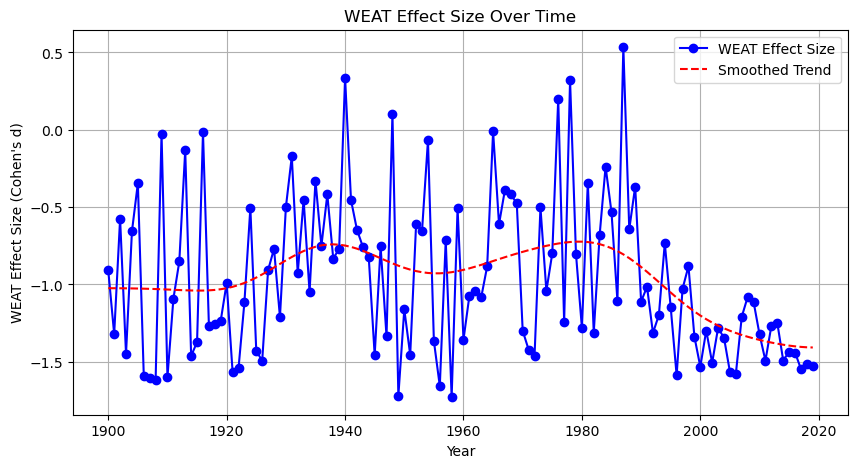

{1900: (-0.9086996, None, None),
 1901: (-1.3207757, None, None),
 1902: (-0.5753163, None, None),
 1903: (-1.4490026, None, None),
 1904: (-0.6571603, None, None),
 1905: (-0.34554803, None, None),
 1906: (-1.5905821, None, None),
 1907: (-1.6019398, None, None),
 1908: (-1.6155485, None, None),
 1909: (-0.024616938, None, None),
 1910: (-1.5984197, None, None),
 1911: (-1.0927583, None, None),
 1912: (-0.85139465, None, None),
 1913: (-0.13187306, None, None),
 1914: (-1.4628234, None, None),
 1915: (-1.3713503, None, None),
 1916: (-0.015715497, None, None),
 1917: (-1.2653939, None, None),
 1918: (-1.2587134, None, None),
 1919: (-1.2333076, None, None),
 1920: (-0.9903465, None, None),
 1921: (-1.5651569, None, None),
 1922: (-1.5427904, None, None),
 1923: (-1.1142806, None, None),
 1924: (-0.5051009, None, None),
 1925: (-1.4289244, None, None),
 1926: (-1.4936143, None, None),
 1927: (-0.90654814, None, None),
 1928: (-0.76937157, None, None),
 1929: (-1.2112837, None, None),
 

In [11]:
target1 = ["poor", "destitute"]
target2 = ["rich", "wealthy"]
attribute1 = ["happy", "joy"]
attribute2 = ["unhappy", "sad"]

compute_weat_over_years(
    target1,
    target2,
    attribute1,
    attribute2,
    start_year=1900,
    end_year=2019,
    model_dir=f"{model_path}",
    num_permutations=0,
    plot=1,
    smooth=True,
    sigma=8,
    return_std=False
)

### `plot_nearest_neighbors` function

This function plots the N nearest neighbors to a target word for a specific year, showing their cosine similarity scores in a horizontal bar chart.

In [ ]:
# Example: Find the 10 nearest neighbors to 'computer' in 2019
neighbors = plot_nearest_neighbors(
    word='computer',
    year=2019,
    model_dir=model_path,
    n=10
)

# The function also returns the neighbors as a list
print("\nNearest neighbors:")
for word, similarity in neighbors:
    print(f"  {word}: {similarity:.4f}")